In [1]:
# COMPSCI 4ML3 Q1
# Tahseen Ahmed
# Saturday, February 6th, 2020
# ============================
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm # 
from sklearn.linear_model import LinearRegression # Use this for MLR

In [2]:
# Solves the Least Squares problem for given X, Y. 
# alpha is the regularization coefficient
# Output is the estimated y for both X and X_all
def solve_ols(X_train, Y_train, X_test, alpha):
    W = np.dot(np.linalg.pinv(np.dot(X_train.T, X_train) + alpha*np.identity(np.shape(X_train)[1])), np.dot(X_train.T, Y_train))
    print ("Optimal W is ", W.flatten())
    return np.dot(X_train, W), np.dot(X_test, W)

In [3]:
def run_ols(X_train, Y_train, X_test, Y_test, alpha, plot_X_train, plot_X_test, description):
    Y_LS_train, Y_LS_test = solve_ols(X_train, Y_train, X_test, alpha)
    
    fig, ax = plt.subplots(figsize = (12,12), dpi = 50)
    
    # Plotting the train data
    #ax.plot(X_train, Y_train, 'rx')
    # Plotting the prediction of our model on the train data
    #ax.plot(X_train, Y_LS_train, 'bo')

    # Plotting the actual y values for the test data
    ax.plot(plot_X_test, Y_test, 'rx', label='The actual y values for test data')
    # Plotting the prediction of our model on the test data
    ax.plot(plot_X_test, Y_LS_test, 'bo', label='The predicted y values for test data')
    
    ax.legend(loc='lower right', prop={'size': 20})
    ax.set(xlabel='X', ylabel='Y', title=description)
    ax.grid()
    plt.show()
    
    print ("Mean Squarred Error (MSE) of train data: " , np.square(np.linalg.norm(Y_LS_train-Y_train))/Y_train.size)
    print ("Mean Squarred Error (MSE) of test data: " , np.square(np.linalg.norm(Y_LS_test-Y_test))/Y_test.size)

In [4]:
# generate n data points based on a combination of sinosuidal and polynomial functions
# taken from ols.ipynb from lecture.

def generate_data(n):
    X = np.random.rand(n, 1)
    X = np.sort(X, axis = 0)
    Y = (2 * X**2) + (X**3)
    # Adding noise
    Y = Y + 0.1*np.random.randn(n,1)
    return X, Y

# Uses scklearn's OLS estimation to get coefficients and 
myX,myY = generate_data(25000)
regressor = LinearRegression()
regressor.fit(myX,myY)

# Display estimated coefficients, including the intercept.
print(regressor.coef_[0][0], regressor.intercept_[0])

2.904751168677431 -0.5368403355313528


In [5]:
# Using statsmodels to get OLS
x,y  = generate_data(3000) 
# adding the constant term 
x = sm.add_constant(x) 
  
result = sm.OLS(y, x).fit() 
  
# Print Summary Table
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 2.715e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:20:14   Log-Likelihood:                -453.33
No. Observations:                3000   AIC:                             910.7
Df Residuals:                    2998   BIC:                             922.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5384      0.010    -52.734      0.0

Optimal W is  [2.11280653]


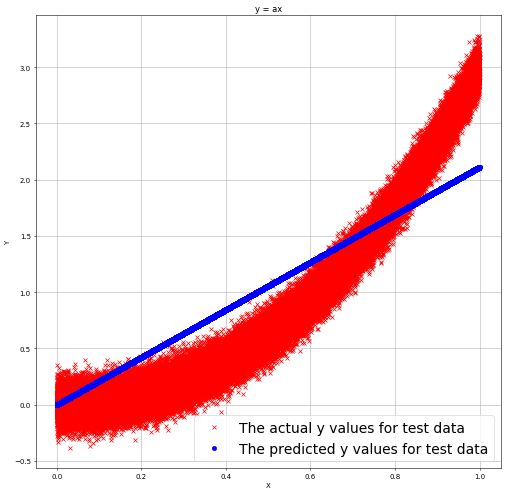

Mean Squarred Error (MSE) of train data:  0.1513725384206264
Mean Squarred Error (MSE) of test data:  0.14957848248210318
Optimal W is  [ 2.90904385 -0.53444236]


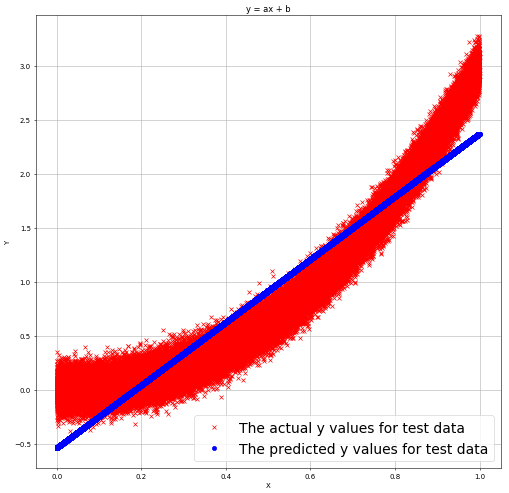

Mean Squarred Error (MSE) of train data:  0.08008036265537737
Mean Squarred Error (MSE) of test data:  0.07845247047947941


In [6]:
# Number of training and test points.
n_train = 10000
n_test  = 100000

# This will be used later for regularization. For now it is set to 0.
alpha = 0

# Generating train and test data.
X_train, Y_train = generate_data(n_train)
X_test, Y_test = generate_data(n_test)
print("===========================================================")
# Homogenous line/hyperplane (goes through the origin)
run_ols(X_train, Y_train, X_test, Y_test, alpha, X_train, X_test, "y = ax")
print("===========================================================")
# Non-homogenous line/hyperplane
# First we augment the data with an all 1 column/feature
X_augmented_train = np.concatenate((X_train, np.ones((n_train, 1))), axis=1)
X_augmented_test = np.concatenate((X_test, np.ones((n_test, 1))), axis=1)

print("===========================================================")
# Now we run OLS on the augmented data.
run_ols(X_augmented_train, Y_train, X_augmented_test, Y_test, alpha, X_train, X_test, "y = ax + b")
print("===========================================================")